In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
import umap

In [63]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_fourier_z = pd.read_csv(os.path.join(folder_path, "features_fourier_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_fourier_mm = pd.read_csv(os.path.join(folder_path, "features_fourier_all_minmax.csv"))

In [64]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_fourier_z_cl= df_fourier_z.drop(columns=['filename', 'label'])

In [65]:
df_fourier_z_cl

,mean_magnitude,std_magnitude,low_freq_magnitude,high_freq_magnitude
0,-0.675069,-0.789859,-0.897021,-1.099034
1,-0.332674,0.421457,-0.087640,0.128736
2,-0.726203,-1.157138,-0.882415,-0.876548
3,-0.624806,-0.816866,-0.490506,-0.490618
4,-1.317448,-1.644363,-1.428906,-1.326237
...,...,...,...,...
532,0.749086,0.945783,0.887860,0.885922
533,0.989613,0.780056,1.338128,1.304986
534,0.873905,0.820400,0.651903,0.660034
535,0.896289,1.520130,0.721742,1.004862


In [66]:
bandwidth_values = [0.1, 0.2, 0.3, 0.4, 1.0, 1.3, 1.33]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(df_fourier_z_cl.values)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))
    
    if n_clusters > 1:  # Solo tiene sentido calcular Silhouette si hay más de 1 clúster
        score = silhouette_score(df_fourier_z_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 0.10 | Clusters: 470 | Silhouette Score: 0.094
Bandwidth: 0.20 | Clusters: 217 | Silhouette Score: 0.226
Bandwidth: 0.30 | Clusters: 87 | Silhouette Score: 0.224
Bandwidth: 0.40 | Clusters: 42 | Silhouette Score: 0.255
Bandwidth: 1.00 | Clusters: 4 | Silhouette Score: 0.421
Bandwidth: 1.30 | Clusters: 2 | Silhouette Score: 0.523
Bandwidth: 1.33 | Clusters: 2 | Silhouette Score: 0.520


In [67]:
bandwidth = 1.33
meanshift_z = MeanShift(bandwidth=bandwidth)
meanshift_z.fit(df_fourier_z_cl)

MeanShift(bandwidth=1.33)

In [68]:
tsne_z = TSNE(n_components=2, random_state=42)
X_tsne_z = tsne_z.fit_transform(df_fourier_z_cl.values)

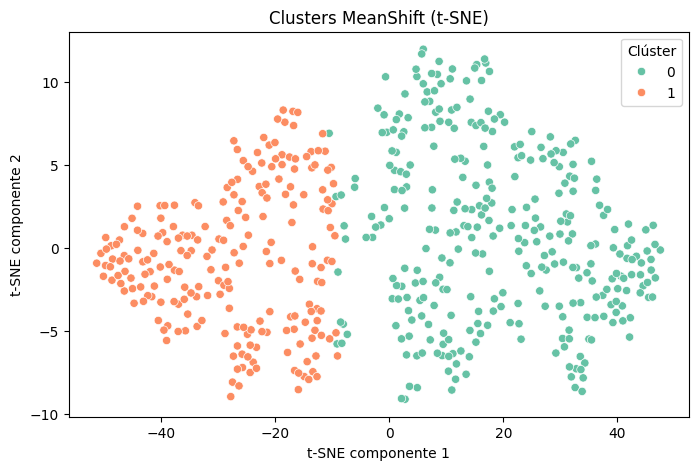

          filename    label  cluster
0      callo_1.png  smaller        1
1     callo_10.png  smaller        0
2    callo_100.png  smaller        1
3    callo_101.png  smaller        1
4    callo_102.png  smaller        1
..             ...      ...      ...
532   callo_95.png   higher        0
533   callo_96.png   higher        0
534   callo_97.png   higher        0
535   callo_98.png   higher        0
536   callo_99.png   higher        0

[537 rows x 3 columns]


In [69]:
# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_z[:, 0], y=X_tsne_z[:, 1], hue=labels, palette='Set2')
plt.title('Clusters MeanShift (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_fourier_z['filename'],
    'label': df_fourier_z['label'],
    'cluster': labels
})

# Mostrar primeras filas
print(df_resultado)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


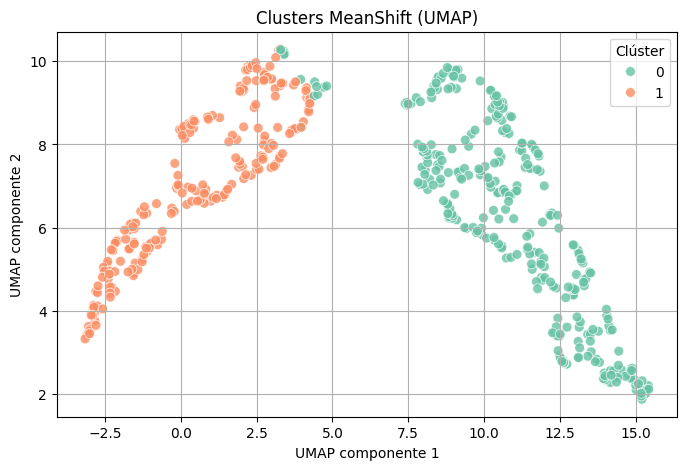

In [70]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap_z = reducer.fit_transform(df_fourier_z_cl)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_umap_z[:, 0],
    y=X_umap_z[:, 1],
    hue=labels,        
    palette='Set2',
    s=50,
    alpha=0.8
)
plt.title('Clusters MeanShift (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [71]:
score_z = silhouette_score(df_fourier_z_cl, labels)
print(f"Silhouette Score: {score_z:.3f}")

Silhouette Score: 0.520


In [72]:
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])
print(tabla_contingencia)


cluster    0    1
label            
higher   246   22
smaller   71  198


se hace lo mismo con normalizacion min-max:

In [73]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_fourier_mm_cl= df_fourier_mm.drop(columns=['filename', 'label'])

In [74]:
bandwidth_values = [0.1, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26]

for bw in bandwidth_values:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(df_fourier_mm_cl.values)
    labels = ms_mm.labels_
    n_clusters_mm = len(np.unique(labels))
    
    if n_clusters_mm > 1:  # Solo tiene sentido calcular Silhouette si hay más de 1 clúster
        score = silhouette_score(df_fourier_mm_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 0.10 | Clusters: 2 | Silhouette Score: 0.259
Bandwidth: 0.20 | Clusters: 2 | Silhouette Score: 0.442
Bandwidth: 0.21 | Clusters: 2 | Silhouette Score: 0.443
Bandwidth: 0.22 | Clusters: 2 | Silhouette Score: 0.521
Bandwidth: 0.23 | Clusters: 2 | Silhouette Score: 0.523
Bandwidth: 0.24 | Clusters: 2 | Silhouette Score: 0.524
Bandwidth: 0.25 | Clusters: 2 | Silhouette Score: 0.526
Bandwidth: 0.26 | Clusters: 2 | Silhouette Score: 0.523


In [75]:
bandwidth = 0.25
meanshift_mm = MeanShift(bandwidth=bandwidth)
meanshift_mm.fit(df_fourier_mm_cl)

MeanShift(bandwidth=0.25)

In [76]:
tsne_mm = TSNE(n_components=2, random_state=42)
X_tsne_mm = tsne_mm.fit_transform(df_fourier_mm_cl.values)

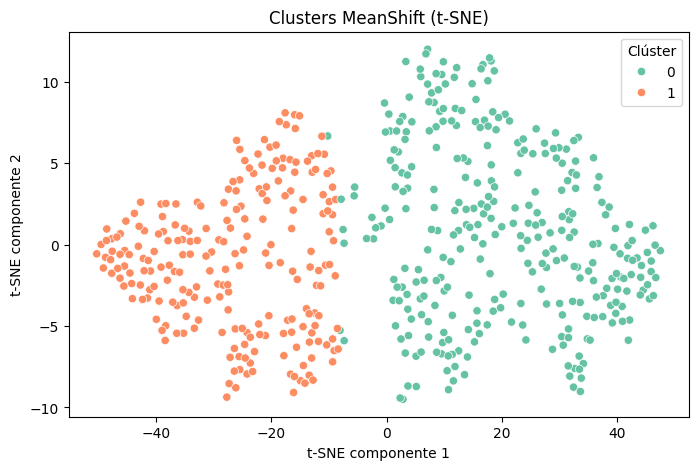

          filename    label  cluster
0      callo_1.png  smaller        1
1     callo_10.png  smaller        0
2    callo_100.png  smaller        1
3    callo_101.png  smaller        1
4    callo_102.png  smaller        1
..             ...      ...      ...
532   callo_95.png   higher        0
533   callo_96.png   higher        0
534   callo_97.png   higher        0
535   callo_98.png   higher        0
536   callo_99.png   higher        0

[537 rows x 3 columns]


In [77]:
# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_mm[:, 0], y=X_tsne_mm[:, 1], hue=labels, palette='Set2')
plt.title('Clusters MeanShift (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_fourier_z['filename'],
    'label': df_fourier_z['label'],
    'cluster': labels
})

# Mostrar primeras filas
print(df_resultado)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


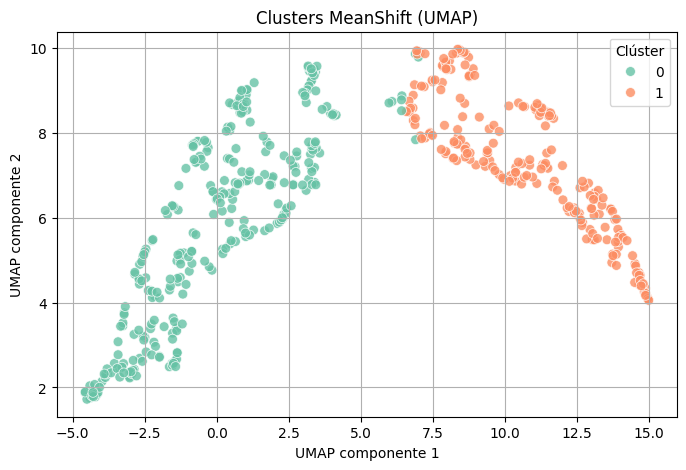

In [78]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap_z = reducer.fit_transform(df_fourier_mm_cl)


plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_umap_z[:, 0],
    y=X_umap_z[:, 1],
    hue=labels,        
    palette='Set2',
    s=50,
    alpha=0.8
)
plt.title('Clusters MeanShift (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [79]:
score_mm = silhouette_score(df_fourier_mm_cl, labels)
print(f"Silhouette Score: {score_mm:.3f}")

Silhouette Score: 0.523


In [80]:
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])
print(tabla_contingencia)

cluster    0    1
label            
higher   246   22
smaller   66  203


voy a probar hacerle reduccion de dimensionalidad con umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_8944\2565675009.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


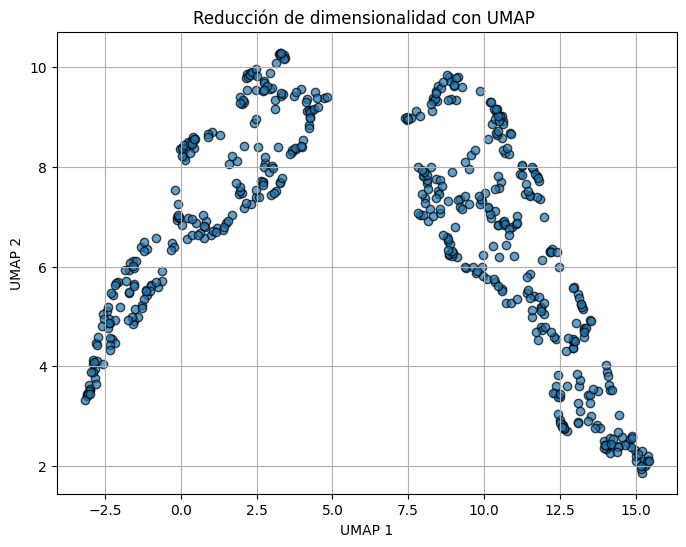

In [81]:
# Reduccion de la dimensionalidad con UMAP
umap_model_z = umap.UMAP(n_neighbors=15,n_components=2, random_state=42)
X_umap_z = umap_model_z.fit_transform(df_fourier_z_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [82]:
# Estimación del bandwidth
bandwidth_umap = estimate_bandwidth(X_umap_z, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap = MeanShift(bandwidth=bandwidth_umap, bin_seeding=True)
ms_umap.fit(X_umap_z)
labels_umap = ms_umap.labels_  
n_clusters = len(np.unique(labels_umap))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap, return_counts=True)

# Mostrar resultados solo si hay más de un clúster y los clústeres son adecuados
if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_z, labels_umap)
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 2.821 | Clusters: 4 | Silhouette Score: 0.570


In [83]:
bandwidth_values_umap = [ 6, 6.5,7, 6.1 ]

for bw in bandwidth_values_umap:
    ms_umap = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_umap.fit(X_umap_z)
    labels_umap = ms_umap.labels_
    n_clusters = len(np.unique(labels_umap))
    
    if n_clusters > 1:  # 
        score = silhouette_score(X_umap_z, labels_umap)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 6.00 | Clusters: 2 | Silhouette Score: 0.649
Bandwidth: 6.50 | Clusters: 2 | Silhouette Score: 0.649
Bandwidth: 7.00 | Clusters: 2 | Silhouette Score: 0.649
Bandwidth: 6.10 | Clusters: 2 | Silhouette Score: 0.649


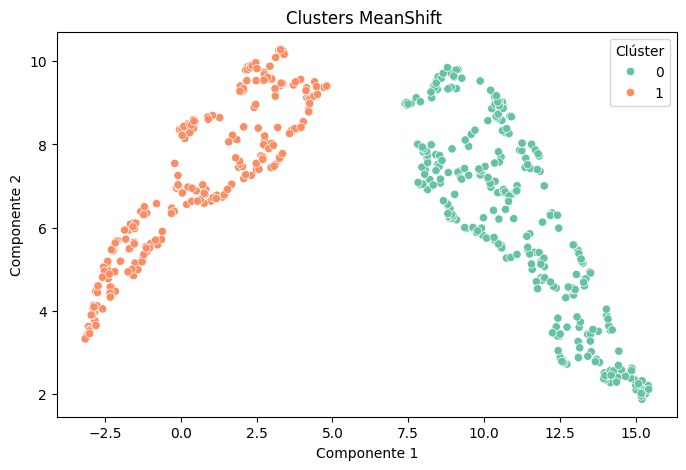

        filename    label  cluster
0    callo_1.png  smaller        1
1   callo_10.png  smaller        0
2  callo_100.png  smaller        1
3  callo_101.png  smaller        1
4  callo_102.png  smaller        1


In [84]:
bandwidth_def = 6
meanshift_z = MeanShift(bandwidth=bandwidth_def, bin_seeding=True)
meanshift_z.fit(X_umap_z) 
labels_umap = meanshift_z.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z[:, 0], y=X_umap_z[:, 1], hue=labels_umap, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_fourier_z['filename'],
    'label': df_fourier_z['label'],
    'cluster': labels_umap  # Usamos las etiquetas generadas en la última ejecución
})

# Mostrar primeras filas
print(df_resultado.head())

In [85]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])

# Mostrar la tabla
print(tabla_contingencia)


cluster    0    1
label            
higher   241   27
smaller   63  206


min-max con umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_8944\510690170.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


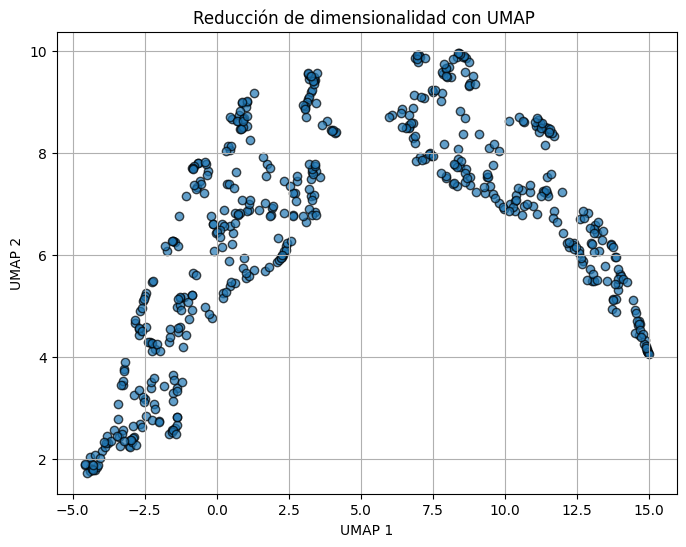

In [86]:
# Reduccion de la dimensionalidad con UMAP
umap_model_mm = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap_mm = umap_model_mm.fit_transform(df_fourier_mm_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [87]:
# Estimación del bandwidth
bandwidth_umap_mm = estimate_bandwidth(X_umap_mm, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap_mm = MeanShift(bandwidth=bandwidth_umap_mm, bin_seeding=True)
ms_umap_mm.fit(X_umap_mm)
labels_umap_mm = ms_umap_mm.labels_  
n_clusters = len(np.unique(labels_umap_mm))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap_mm, return_counts=True)


if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_mm, labels_umap_mm)
    print(f"Auto Bandwidth: {bandwidth_umap_mm:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap_mm:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 2.873 | Clusters: 4 | Silhouette Score: 0.558


In [88]:
bandwidth_values_umap_mm = [5, 6, 6.1, 7, 5.5]

for bw in bandwidth_values_umap_mm:
    ms_umap_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_umap_mm.fit(X_umap_mm)
    labels_umap_mm = ms_umap_mm.labels_
    n_clusters = len(np.unique(labels_umap_mm))
    
    if n_clusters > 1:  # 
        score = silhouette_score(X_umap_mm, labels_umap_mm)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 5.00 | Clusters: 2 | Silhouette Score: 0.639
Bandwidth: 6.00 | Clusters: 2 | Silhouette Score: 0.639
Bandwidth: 6.10 | Clusters: 2 | Silhouette Score: 0.639
Bandwidth: 7.00 | Clusters: 2 | Silhouette Score: 0.624
Bandwidth: 5.50 | Clusters: 2 | Silhouette Score: 0.639


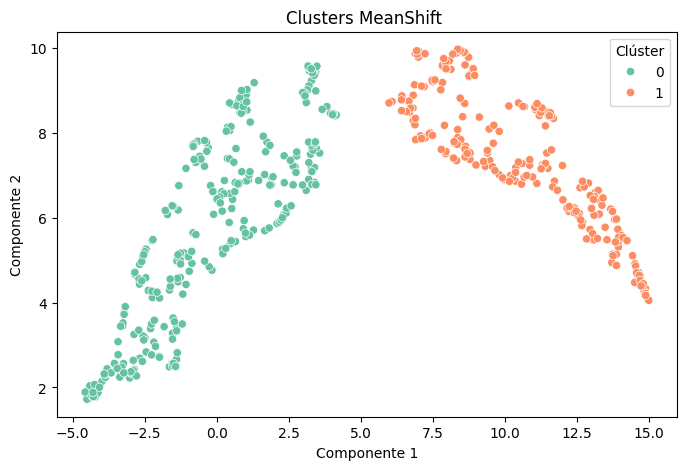

In [89]:
bandwidth_def_mm = 6
meanshift_mm = MeanShift(bandwidth=bandwidth_def_mm, bin_seeding=True)
meanshift_mm.fit(X_umap_mm) 
labels_umap_mm = meanshift_mm.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_mm[:, 0], y=X_umap_mm[:, 1], hue=labels_umap_mm, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado_mm_umap = pd.DataFrame({
    'filename': df_fourier_mm['filename'],
    'label': df_fourier_mm['label'],
    'cluster': labels_umap_mm  
})



In [90]:
tabla_contingencia_mm_umap = pd.crosstab(df_resultado_mm_umap['label'], df_resultado_mm_umap['cluster'])
print(tabla_contingencia_mm_umap)


cluster    0    1
label            
higher   241   27
smaller   63  206
